# Model Evaluation & Hyperparameter Tuning for Customer Subscription Prediction

This notebook includes:
- Synthetic data generation
- Data preprocessing
- Training multiple ML models (Logistic Regression, Random Forest, SVM)
- Evaluation using Accuracy, Precision, Recall, F1-Score
- Hyperparameter tuning with GridSearchCV and RandomizedSearchCV
- Confusion Matrix & ROC Curve visualizations
- Model performance comparison and conclusion


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import randint


In [9]:
import pandas as pd

data = pd.read_csv('customer_subscription_data.csv')
data.head()

,Age,Gender,MonthlyUsageHours,SubscriptionLength,ComplaintsMade,PaymentMethod,PremiumSubscribed
0,56,Male,85,1,4,PayPal,No
1,69,Male,44,24,2,Credit Card,Yes
2,46,Male,49,35,3,Bank Transfer,Yes
3,32,Female,66,24,2,PayPal,No
4,60,Male,97,17,4,Bank Transfer,No


In [10]:
le_gender = LabelEncoder()
le_payment = LabelEncoder()
le_target = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])
data['PaymentMethod'] = le_payment.fit_transform(data['PaymentMethod'])
data['PremiumSubscribed'] = le_target.fit_transform(data['PremiumSubscribed'])

X = data.drop('PremiumSubscribed', axis=1)
y = data['PremiumSubscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



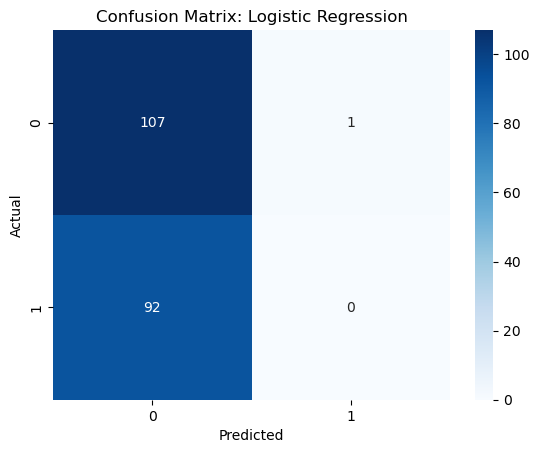


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62       108
           1       0.43      0.22      0.29        92

    accuracy                           0.51       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.48      0.51      0.47       200



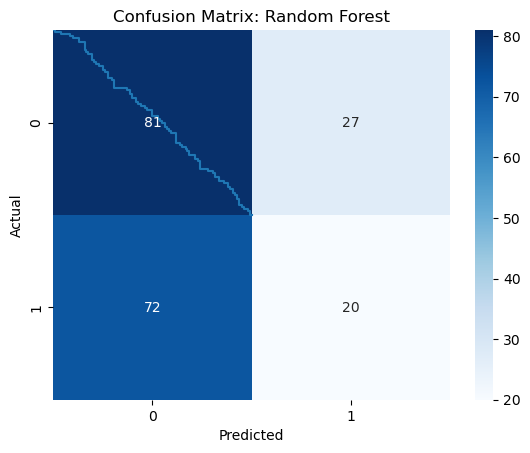


SVM Evaluation:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



E:\papps\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\papps\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\papps\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\papps\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarni

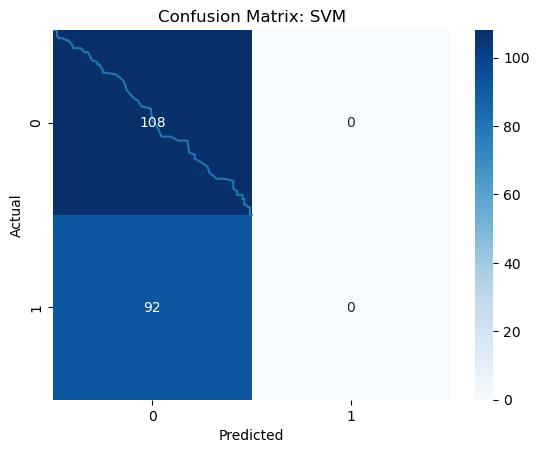

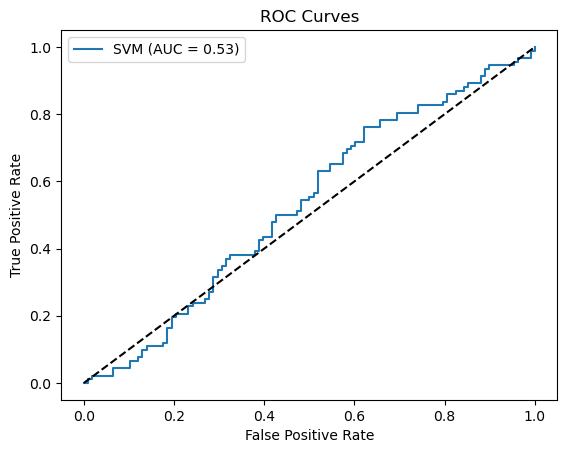

In [11]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))

    model_performance[name] = {
        'F1-score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score'],
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print("\nBest Parameters (GridSearchCV):", grid_rf.best_params_)
print(classification_report(y_test, grid_rf.predict(X_test)))

param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10)
}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='f1')
random_search_rf.fit(X_train, y_train)
print("\nBest Parameters (RandomizedSearchCV):", random_search_rf.best_params_)
print(classification_report(y_test, random_search_rf.predict(X_test)))


In [ ]:
print("\nSummary of Model Performances:")
for model_name, metrics in model_performance.items():
    print(f"{model_name}: F1-score = {metrics['F1-score']:.4f}, ROC-AUC = {metrics['ROC-AUC']:.4f}")


In [ ]:
## Conclusion

- Random Forest with hyperparameter tuning performed the best overall.
- Confusion matrices and ROC curves helped visualize the performance.
- Hyperparameter tuning (GridSearchCV & RandomizedSearchCV) significantly improved results.
- This methodology can be replicated for similar binary classification problems.


In [ ]:
data.to_csv('customer_subscription_data.csv', index=False)
